In [105]:

import warnings
import sys
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import sys
%run Securities.py

In [106]:
tech_tickers = ["TSLA", "AMZN", "AAPL", "GOOG", "MSFT"]

In [107]:
securities = Stock_returns_analysis(tech_tickers, start_date = "2021-1-1", end_date = "2022-1-1")

In [108]:
securities.download_stocks_closing(column_name = "Adj Close")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,243.256668,159.331497,127.679993,86.412003,213.341995
2021-01-05,245.036667,160.925507,129.258591,87.045998,213.547791
2021-01-06,251.993332,156.919006,124.907578,86.764503,208.010666
2021-01-07,272.013336,158.108002,129.169800,89.362503,213.930023
2021-01-08,293.339996,159.134995,130.284714,90.360497,215.233444
...,...,...,...,...,...
2021-12-27,364.646667,169.669495,179.016129,148.063995,338.423340
2021-12-28,362.823334,170.660995,177.983673,146.447998,337.237457
2021-12-29,362.063324,169.201004,178.073044,146.504501,337.929199


In [109]:
securities.stock_stats()

,TSLA,AMZN,AAPL,GOOG,MSFT
max,409.970001,186.570496,179.016129,150.709000,339.075531
min,187.666672,147.597504,114.976006,86.412003,208.010666
mean,259.998162,167.193349,139.587719,125.530687,271.712494


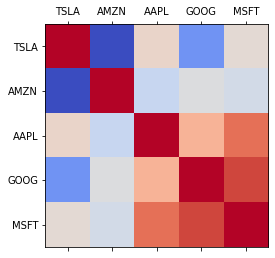

In [110]:
securities.stock_relationship()

In [111]:
len(securities)

5

In [112]:
securities.stock_stats()

,TSLA,AMZN,AAPL,GOOG,MSFT
max,409.970001,186.570496,179.016129,150.709000,339.075531
min,187.666672,147.597504,114.976006,86.412003,208.010666
mean,259.998162,167.193349,139.587719,125.530687,271.712494


In [113]:
securities.fill_values("backward")

,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,243.256668,159.331497,127.679993,86.412003,213.341995
2021-01-05,245.036667,160.925507,129.258591,87.045998,213.547791
2021-01-06,251.993332,156.919006,124.907578,86.764503,208.010666
2021-01-07,272.013336,158.108002,129.169800,89.362503,213.930023
2021-01-08,293.339996,159.134995,130.284714,90.360497,215.233444
...,...,...,...,...,...
2021-12-27,364.646667,169.669495,179.016129,148.063995,338.423340
2021-12-28,362.823334,170.660995,177.983673,146.447998,337.237457
2021-12-29,362.063324,169.201004,178.073044,146.504501,337.929199


In [120]:
print(securities)

Stocks: ['TSLA', 'AMZN', 'AAPL', 'GOOG', 'MSFT']


TSLA       AxesSubplot(0.125,0.125;0.133621x0.755)
AMZN    AxesSubplot(0.285345,0.125;0.133621x0.755)
AAPL     AxesSubplot(0.44569,0.125;0.133621x0.755)
GOOG    AxesSubplot(0.606034,0.125;0.133621x0.755)
MSFT    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

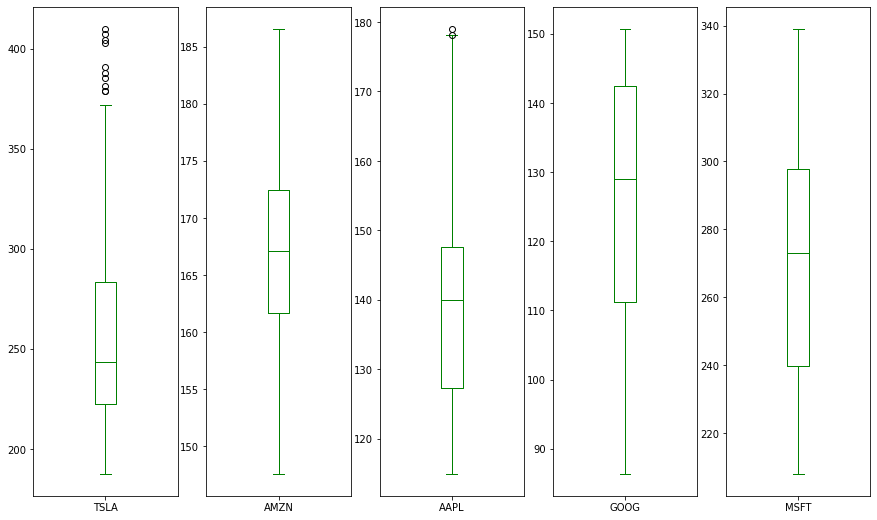

In [114]:
securities.data_distribution()

In [115]:
securities.merged_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-04,TSLA,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,TSLA,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,TSLA,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,TSLA,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,TSLA,285.333344,294.829987,279.463318,293.339996,293.339996,225166500
...,...,...,...,...,...,...,...
2021-12-27,MSFT,335.459991,342.480011,335.429993,342.450012,338.423340,19947000
2021-12-28,MSFT,343.149994,343.809998,340.320007,341.250000,337.237457,15661500
2021-12-29,MSFT,341.299988,344.299988,339.679993,341.950012,337.929199,15042000


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

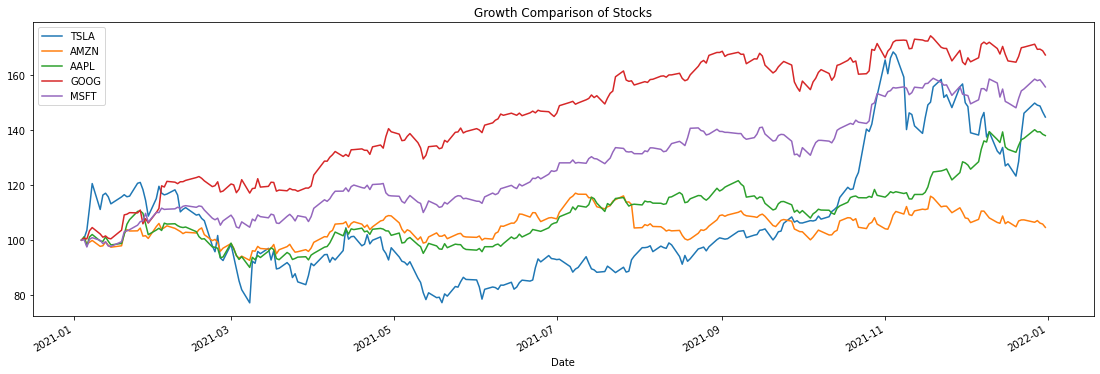

In [116]:
securities.normalization()

In [117]:
securities.get_returns("Simple")

,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.007317,0.010004,0.012364,0.007337,0.000965
2021-01-06,0.028390,-0.024897,-0.033661,-0.003234,-0.025929
2021-01-07,0.079447,0.007577,0.034123,0.029943,0.028457
2021-01-08,0.078403,0.006496,0.008631,0.011168,0.006093
...,...,...,...,...,...
2021-12-27,0.025248,-0.008178,0.022975,0.006263,0.023186
2021-12-28,-0.005000,0.005844,-0.005767,-0.010914,-0.003504
2021-12-29,-0.002095,-0.008555,0.000502,0.000386,0.002051


In [118]:
securities.individual_return()

The Simple return of the stocks are 
TSLA    51.53
AMZN     7.38
AAPL    35.24
GOOG    54.15
MSFT    46.36
dtype: float64


In [119]:
securities.individual_risk_factor()

TSLA    0.545551
AMZN    0.239457
AAPL    0.249160
GOOG    0.236126
MSFT    0.208798
dtype: float64
The lowest risk factor is 0.2087978507040224


In [22]:
max_of_multiple_lists([[1,2,3,345,556], [6,4,23,2,323], [945,5,23,6]])

945